<a href="https://colab.research.google.com/github/kekuatanpow1/resolusi-saya/blob/main/UTS_ML(MachineLearning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Degree 1: R² = 1.0000, RMSE = 0.00
Degree 2: R² = 1.0000, RMSE = 0.00
Degree 3: R² = 1.0000, RMSE = 0.00
Degree 4: R² = 1.0000, RMSE = 0.00


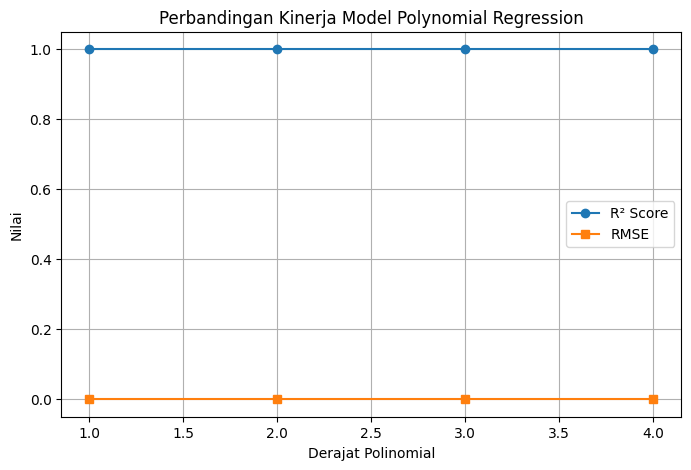


Model terbaik: Polynomial degree 1


In [ ]:

# 1️⃣ Import library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 2️⃣ Generate dataset sintetis
np.random.seed(42)
n_samples = 200

# Fitur
luas_tanah = np.random.uniform(50, 500, n_samples)
luas_bangunan = np.random.uniform(30, 400, n_samples)
kamar_tidur = np.random.randint(1, 6, n_samples)
umur_bangunan = np.random.uniform(0, 30, n_samples)
jarak_pusat_kota = np.random.uniform(1, 20, n_samples)

# Target (harga properti) - dibuat dengan hubungan non-linear
harga = (
    50*luas_tanah +
    100*luas_bangunan +
    200*kamar_tidur -
    30*umur_bangunan**1.2 -
    40*jarak_pusat_kota +
    np.random.normal(0, 50000, n_samples)
)
harga = np.clip(harga/1000, 200, 5000)  # dalam juta rupiah

# Buat DataFrame
data = pd.DataFrame({
    'Luas Tanah': luas_tanah,
    'Luas Bangunan': luas_bangunan,
    'Jumlah Kamar': kamar_tidur,
    'Umur Bangunan': umur_bangunan,
    'Jarak ke Pusat Kota': jarak_pusat_kota,
    'Harga Properti (juta)': harga
})

# 3️⃣ Pisahkan fitur dan target
X = data[['Luas Tanah', 'Luas Bangunan', 'Jumlah Kamar', 'Umur Bangunan', 'Jarak ke Pusat Kota']]
y = data['Harga Properti (juta)']

# 4️⃣ Split data train-test (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5️⃣ Normalisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6️⃣ Uji beberapa derajat polinomial
degrees = [1, 2, 3, 4]
r2_scores = []
rmse_scores = []

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_poly_train = poly.fit_transform(X_train_scaled)
    X_poly_test = poly.transform(X_test_scaled)

    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    y_pred = model.predict(X_poly_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    r2_scores.append(r2)
    rmse_scores.append(rmse)

    print(f"Degree {d}: R² = {r2:.4f}, RMSE = {rmse:.2f}")

# 7️⃣ Visualisasi hasil evaluasi
plt.figure(figsize=(8,5))
plt.plot(degrees, r2_scores, marker='o', label='R² Score')
plt.plot(degrees, rmse_scores, marker='s', label='RMSE')
plt.title('Perbandingan Kinerja Model Polynomial Regression')
plt.xlabel('Derajat Polinomial')
plt.ylabel('Nilai')
plt.legend()
plt.grid(True)
plt.show()

# 8️⃣ Model terbaik berdasarkan R²
best_degree = degrees[np.argmax(r2_scores)]
print(f"\nModel terbaik: Polynomial degree {best_degree}")


In [ ]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

# ----------------------------
# A. DATA GENERATION (5 poin)
# ----------------------------
np.random.seed(42)
n_samples = 250  # lebih dari 200 sampel

# Fitur (buat hubungan non-linear & realistis)
luas_tanah = np.random.uniform(50, 500, n_samples)
luas_bangunan = np.random.uniform(30, 400, n_samples)
kamar_tidur = np.random.randint(1, 6, n_samples)
umur_bangunan = np.random.uniform(0, 30, n_samples)
jarak_pusat_kota = np.random.uniform(1, 20, n_samples)

# Target (Harga Properti dalam juta rupiah)
# Dihubungkan secara non-linear dengan fitur
harga = (
    0.5 * luas_tanah +
    1.2 * luas_bangunan**1.05 +
    300 * kamar_tidur -
    20 * umur_bangunan**1.3 -
    100 * np.log(jarak_pusat_kota + 1) +
    np.random.normal(0, 20000, n_samples)
)
harga = np.clip(harga/10, 200, 5000)  # pastikan realistis (200–5000 juta)

# Buat DataFrame
data = pd.DataFrame({
    'Luas Tanah (m2)': luas_tanah,
    'Luas Bangunan (m2)': luas_bangunan,
    'Jumlah Kamar Tidur': kamar_tidur,
    'Umur Bangunan (tahun)': umur_bangunan,
    'Jarak ke Pusat Kota (km)': jarak_pusat_kota,
    'Harga Properti (juta)': harga
})

print("✅ Dataset berhasil dibuat dengan", len(data), "sampel.")
data.head()


✅ Dataset berhasil dibuat dengan 250 sampel.


,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar Tidur,Umur Bangunan (tahun),Jarak ke Pusat Kota (km),Harga Properti (juta)
0,218.543053,138.946090,1,1.554706,13.635697,200.000000
1,477.821438,172.486160,1,10.098128,4.332054,200.000000
2,379.397274,344.920568,1,4.032440,18.373827,1526.759404
3,319.396318,147.261142,5,1.901249,8.956640,2321.196180
4,120.208388,92.712316,4,29.698807,8.279632,200.000000


📊 Statistical Summary:


,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar Tidur,Umur Bangunan (tahun),Jarak ke Pusat Kota (km),Harga Properti (juta)
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,270.686828,217.482053,2.940000,14.659689,11.038004,931.663867
std,133.848192,111.113255,1.442471,8.692653,5.661285,1095.100920
min,52.277713,34.009931,1.000000,0.138961,1.121332,200.000000
25%,153.909903,132.867164,2.000000,6.772994,5.935558,200.000000
50%,276.196126,224.397806,3.000000,14.392472,11.776324,200.000000
75%,388.978792,310.097512,4.000000,22.297196,16.002944,1335.983411
max,494.099121,397.396975,5.000000,29.906228,19.960748,5000.000000


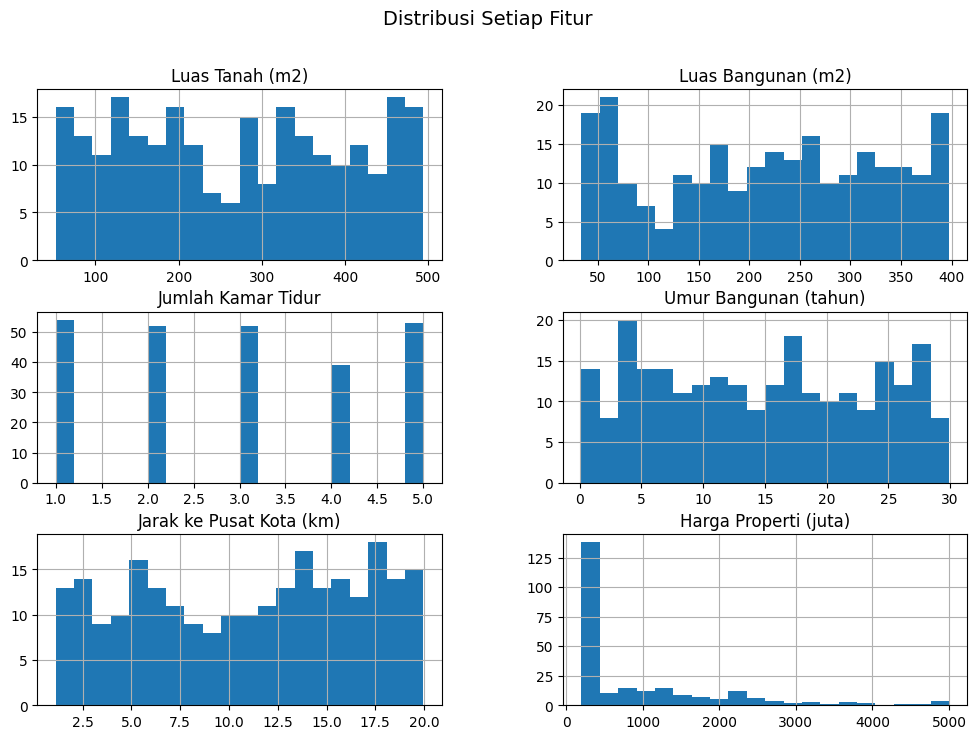

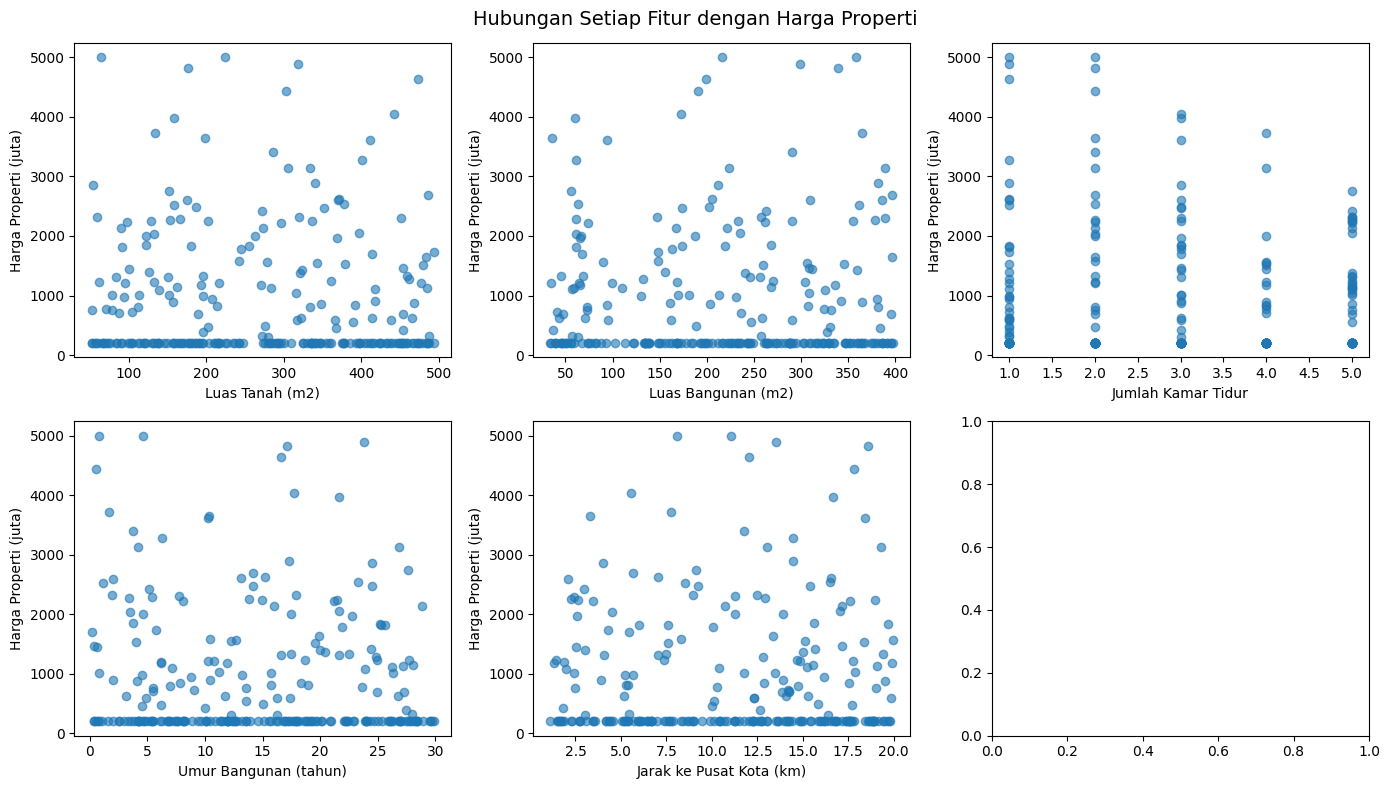

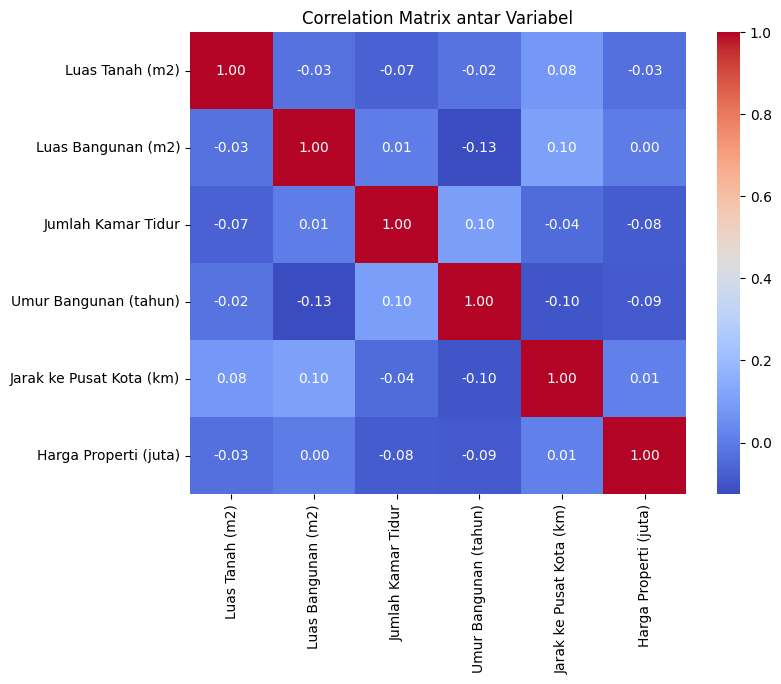

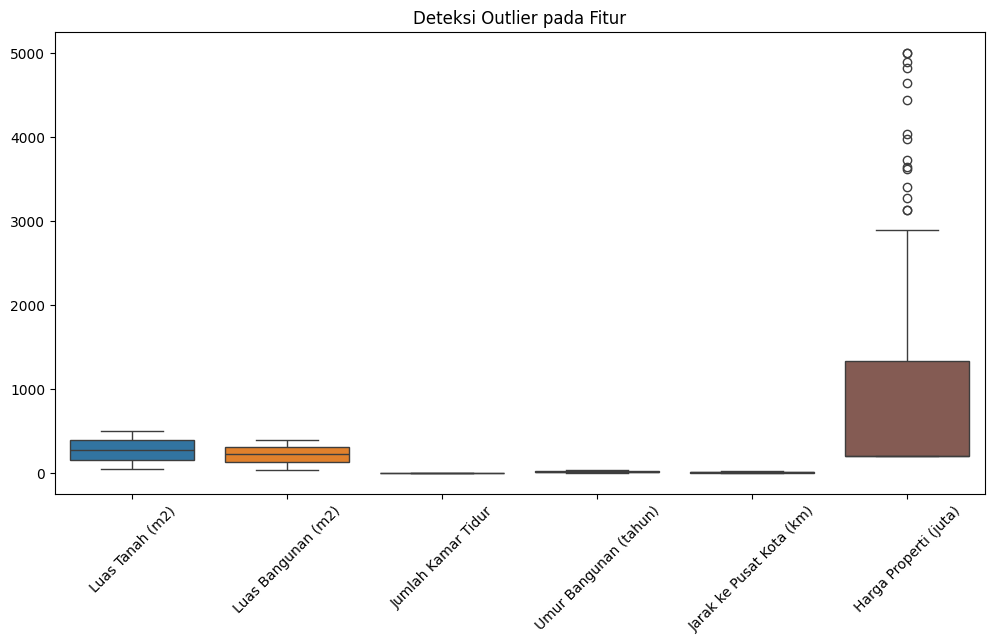

In [ ]:
# 1️⃣ Statistical summary
print("📊 Statistical Summary:")
display(data.describe())

# 2️⃣ Distribusi setiap fitur (histogram)
data.hist(bins=20, figsize=(12,8))
plt.suptitle("Distribusi Setiap Fitur", fontsize=14)
plt.show()

# 3️⃣ Scatter plot fitur vs harga
fig, axes = plt.subplots(2, 3, figsize=(14,8))
axes = axes.ravel()
for i, col in enumerate(data.columns[:-1]):
    axes[i].scatter(data[col], data['Harga Properti (juta)'], alpha=0.6)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Harga Properti (juta)")
plt.suptitle("Hubungan Setiap Fitur dengan Harga Properti", fontsize=14)
plt.tight_layout()
plt.show()

# 4️⃣ Correlation matrix (heatmap)
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix antar Variabel")
plt.show()

# 5️⃣ Identifikasi Outliers (boxplot)
plt.figure(figsize=(12,6))
sns.boxplot(data=data)
plt.title("Deteksi Outlier pada Fitur")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# 1️⃣ Cek missing values
print("🔍 Mengecek missing values:")
print(data.isnull().sum())

# 2️⃣ Split fitur dan target
X = data.drop(columns=['Harga Properti (juta)'])
y = data['Harga Properti (juta)']

# 3️⃣ Split data menjadi training dan testing (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"\n📦 Data training: {len(X_train)} sampel, Data testing: {len(X_test)} sampel")

# 4️⃣ Feature scaling menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Simpan scaler untuk digunakan saat prediksi
joblib.dump(scaler, 'scaler.pkl')
print("\n✅ Data sudah di-scale dan scaler disimpan sebagai 'scaler.pkl'")


🔍 Mengecek missing values:
Luas Tanah (m2)             0
Luas Bangunan (m2)          0
Jumlah Kamar Tidur          0
Umur Bangunan (tahun)       0
Jarak ke Pusat Kota (km)    0
Harga Properti (juta)       0
dtype: int64

📦 Data training: 175 sampel, Data testing: 75 sampel

✅ Data sudah di-scale dan scaler disimpan sebagai 'scaler.pkl'


📐 Jumlah fitur hasil Polynomial Transformation:

Degree 1 menghasilkan 6 fitur.
Degree 2 menghasilkan 21 fitur.
Degree 3 menghasilkan 56 fitur.
Degree 4 menghasilkan 126 fitur.
Degree 5 menghasilkan 252 fitur.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.193e+05, tolerance: 1.922e+04
  model = cd_fast.enet_coordinate_descent(



📊 Hasil Evaluasi Semua Model:


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.088e+06, tolerance: 1.922e+04
  model = cd_fast.enet_coordinate_descent(


,Degree,Model,Alpha,R2 Score,RMSE
0,1,Lasso,10,-0.039019,1207.530295
1,1,Ridge,10,-0.040772,1208.547951
2,1,Lasso,1,-0.042163,1209.355790
3,1,Ridge,1,-0.042726,1209.682285
4,1,Lasso,0.1,-0.042876,1209.769234
5,1,Ridge,0.1,-0.042937,1209.804694
6,1,Linear,-,-0.042961,1209.818403
7,2,Lasso,10,-0.139505,1264.574293
8,2,Ridge,10,-0.152929,1272.001059
9,2,Lasso,1,-0.161326,1276.624710



✅ Semua model berhasil dilatih dan disimpan!


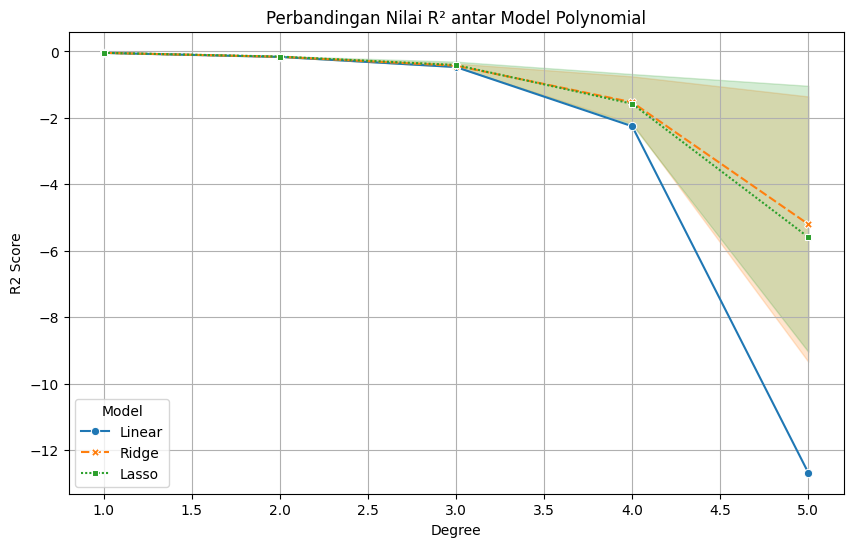

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

# Pastikan X_train_scaled, X_test_scaled, y_train, y_test sudah ada dari tahap sebelumnya

# ---------------------------------------------------
# A. POLYNOMIAL FEATURE ENGINEERING (10 poin)
# ---------------------------------------------------

degrees = [1, 2, 3, 4, 5]
poly_features = {}

print("📐 Jumlah fitur hasil Polynomial Transformation:\n")
for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_poly_train = poly.fit_transform(X_train_scaled)
    X_poly_test = poly.transform(X_test_scaled)
    poly_features[d] = (X_poly_train, X_poly_test)
    print(f"Degree {d} menghasilkan {X_poly_train.shape[1]} fitur.")

# ---------------------------------------------------
# B. MODEL TRAINING (10 poin)
# ---------------------------------------------------

models = {}
results = []
alphas = [0.1, 1, 10]

for d in degrees:
    X_poly_train, X_poly_test = poly_features[d]

    # ===== Linear Regression =====
    lr = LinearRegression()
    lr.fit(X_poly_train, y_train)
    y_pred_lr = lr.predict(X_poly_test)
    r2_lr = r2_score(y_test, y_pred_lr)
    rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
    models[(d, 'Linear')] = lr
    results.append([d, 'Linear', '-', r2_lr, rmse_lr])

    # ===== Ridge Regression =====
    for a in alphas:
        ridge = Ridge(alpha=a)
        ridge.fit(X_poly_train, y_train)
        y_pred_ridge = ridge.predict(X_poly_test)
        r2_ridge = r2_score(y_test, y_pred_ridge)
        rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
        models[(d, f'Ridge α={a}')] = ridge
        results.append([d, 'Ridge', a, r2_ridge, rmse_ridge])

    # ===== Lasso Regression =====
    for a in alphas:
        lasso = Lasso(alpha=a, max_iter=5000)
        lasso.fit(X_poly_train, y_train)
        y_pred_lasso = lasso.predict(X_poly_test)
        r2_lasso = r2_score(y_test, y_pred_lasso)
        rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
        models[(d, f'Lasso α={a}')] = lasso
        results.append([d, 'Lasso', a, r2_lasso, rmse_lasso])

# Hasil dalam tabel
results_df = pd.DataFrame(results, columns=['Degree', 'Model', 'Alpha', 'R2 Score', 'RMSE'])
print("\n📊 Hasil Evaluasi Semua Model:")
display(results_df.sort_values(by='R2 Score', ascending=False).reset_index(drop=True))

# Simpan semua model untuk perbandingan di masa depan
import joblib
for key, model in models.items():
    joblib.dump(model, f'model_degree{key[0]}_{key[1].replace(" ", "_")}.pkl')
print("\n✅ Semua model berhasil dilatih dan disimpan!")

# ---------------------------------------------------
# Visualisasi Perbandingan Kinerja Model
# ---------------------------------------------------
plt.figure(figsize=(10,6))
sns.lineplot(data=results_df, x='Degree', y='R2 Score', hue='Model', style='Model', markers=True)
plt.title("Perbandingan Nilai R² antar Model Polynomial")
plt.grid(True)
plt.show()


In [ ]:
# Ambil subset kecil data untuk efisiensi
X_small = X_train_scaled[:100]
y_small = y_train.values[:100]

# Tambahkan fitur polynomial degree=2 manual
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_small = poly.fit_transform(X_small)

# Normalisasi
X_poly_small = (X_poly_small - X_poly_small.mean(axis=0)) / X_poly_small.std(axis=0)
X_poly_small = np.c_[np.ones(X_poly_small.shape[0]), X_poly_small]  # tambah bias

# Gradient Descent
def gradient_descent(X, y, lr=0.01, epochs=2000):
    m, n = X.shape
    theta = np.zeros(n)
    for _ in range(epochs):
        y_pred = X.dot(theta)
        error = y_pred - y
        grad = (1/m) * X.T.dot(error)
        theta -= lr * grad
    return theta

# Jalankan training
theta = gradient_descent(X_poly_small, y_small, lr=0.001, epochs=5000)

# Prediksi
y_pred_custom = X_poly_small.dot(theta)

# Evaluasi
r2_custom = r2_score(y_small, y_pred_custom)
rmse_custom = np.sqrt(mean_squared_error(y_small, y_pred_custom))

print(f"💡 Custom Polynomial Regression (degree=2): R² = {r2_custom:.4f}, RMSE = {rmse_custom:.2f}")

# Bandingkan dengan sklearn degree=2
X_poly_train, X_poly_test = poly_features[2]
lr_sklearn = LinearRegression().fit(X_poly_train, y_train)
y_pred_sklearn = lr_sklearn.predict(X_poly_test)
r2_sklearn = r2_score(y_test, y_pred_sklearn)
print(f"⚖️  Sklearn Polynomial Regression (degree=2): R² = {r2_sklearn:.4f}")


💡 Custom Polynomial Regression (degree=2): R² = 0.1599, RMSE = 972.39
⚖️  Sklearn Polynomial Regression (degree=2): R² = -0.1644


📊 Evaluasi Metrik untuk Setiap Degree Polynomial:


,Degree,Dataset,R2,MSE,RMSE,MAE,MAPE
0,1,Train,0.017289,1.079079e+06,1.038787e+03,7.926077e+02,2.033609e+02
1,1,Test,-0.042961,1.463661e+06,1.209818e+03,9.278940e+02,2.070288e+02
2,2,Train,0.086105,1.003514e+06,1.001756e+03,7.502371e+02,1.870129e+02
3,2,Test,-0.164388,1.634069e+06,1.278307e+03,9.535003e+02,2.113497e+02
4,3,Train,0.243270,8.309372e+05,9.115576e+02,6.629105e+02,1.694506e+02
5,3,Test,-0.470415,2.063537e+06,1.436502e+03,1.111509e+03,2.634304e+02
6,4,Train,0.711426,3.168726e+05,5.629144e+02,4.134086e+02,1.154340e+02
7,4,Test,-2.251325,4.562814e+06,2.136074e+03,1.564187e+03,4.006840e+02
8,5,Train,1.000000,7.359682e-23,8.578859e-12,6.583280e-12,2.130430e-12
9,5,Test,-12.677516,1.919462e+07,4.381167e+03,3.245806e+03,1.010295e+03


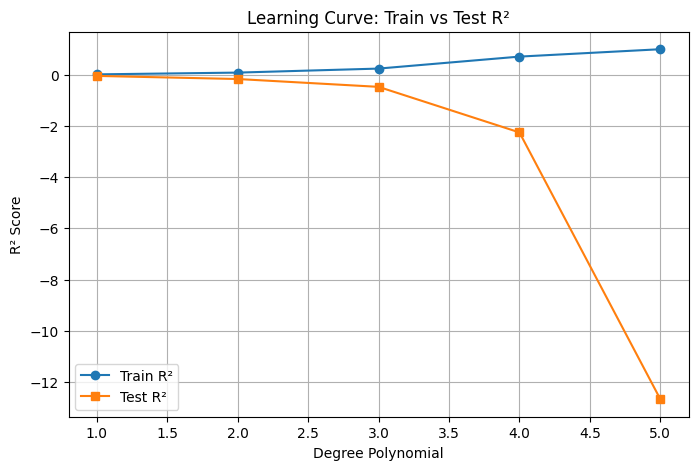

📘 Analisis Overfitting & Underfitting:
Degree 1: R²_train=0.017, R²_test=-0.043 → Underfitting (bias tinggi)
Degree 2: R²_train=0.086, R²_test=-0.164 → Underfitting (bias tinggi)
Degree 3: R²_train=0.243, R²_test=-0.470 → Underfitting (bias tinggi)
Degree 4: R²_train=0.711, R²_test=-2.251 → Overfitting (variance tinggi)
Degree 5: R²_train=1.000, R²_test=-12.678 → Overfitting (variance tinggi)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
metrics_results = []

for d in [1, 2, 3, 4, 5]:
    poly = PolynomialFeatures(degree=d)
    X_poly_train, X_poly_test = poly_features[d]

    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    # Prediksi train & test
    y_train_pred = model.predict(X_poly_train)
    y_test_pred = model.predict(X_poly_test)

    # Hitung metrik
    for dataset, y_true, y_pred in [
        ('Train', y_train, y_train_pred),
        ('Test', y_test, y_test_pred)
    ]:
        r2 = r2_score(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_true, y_pred)
        mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
        metrics_results.append([d, dataset, r2, mse, rmse, mae, mape])

# Tampilkan hasil metrik
metrics_df = pd.DataFrame(metrics_results, columns=['Degree', 'Dataset', 'R2', 'MSE', 'RMSE', 'MAE', 'MAPE'])
print("📊 Evaluasi Metrik untuk Setiap Degree Polynomial:")
display(metrics_df)

# ---------------------------------------------------
# B. OVERFITTING & UNDERFITTING ANALYSIS (10 poin)
# ---------------------------------------------------

train_scores = metrics_df[metrics_df['Dataset']=='Train'][['Degree', 'R2']].set_index('Degree')
test_scores = metrics_df[metrics_df['Dataset']=='Test'][['Degree', 'R2']].set_index('Degree')

plt.figure(figsize=(8,5))
plt.plot(train_scores.index, train_scores['R2'], marker='o', label='Train R²')
plt.plot(test_scores.index, test_scores['R2'], marker='s', label='Test R²')
plt.xlabel("Degree Polynomial")
plt.ylabel("R² Score")
plt.title("Learning Curve: Train vs Test R²")
plt.legend()
plt.grid(True)
plt.show()

# Analisis Overfitting/Underfitting
print("📘 Analisis Overfitting & Underfitting:")
for d in [1,2,3,4,5]:
    r2_train = train_scores.loc[d, 'R2']
    r2_test = test_scores.loc[d, 'R2']
    gap = abs(r2_train - r2_test)
    if r2_train < 0.7 and r2_test < 0.7:
        status = "Underfitting (bias tinggi)"
    elif gap > 0.15 and r2_train > r2_test:
        status = "Overfitting (variance tinggi)"
    else:
        status = "Model optimal (balanced)"
    print(f"Degree {d}: R²_train={r2_train:.3f}, R²_test={r2_test:.3f} → {status}")


🏆 Model terbaik berdasarkan R² test: Degree 1


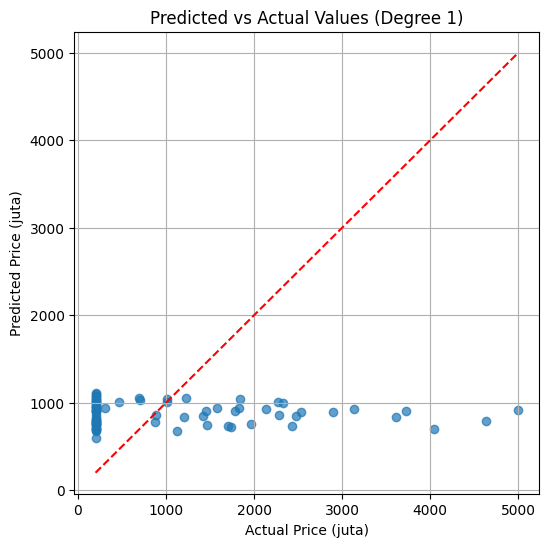

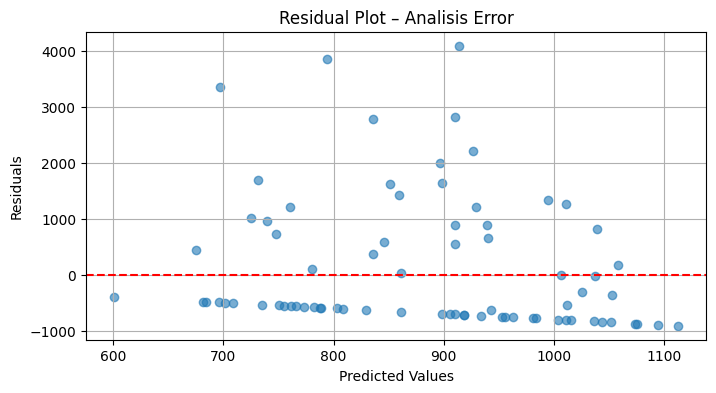

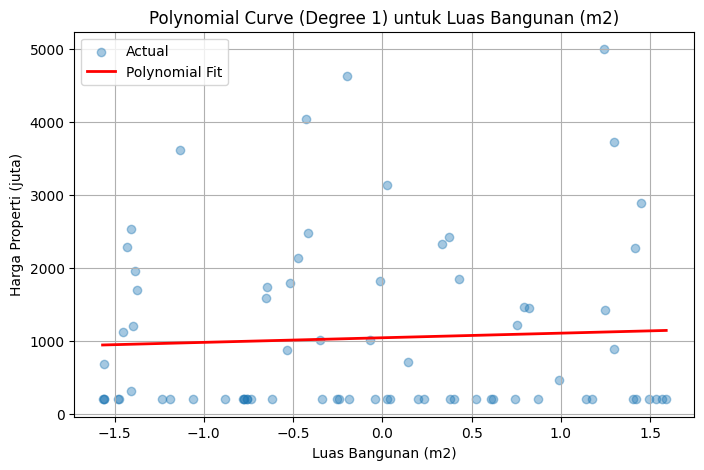

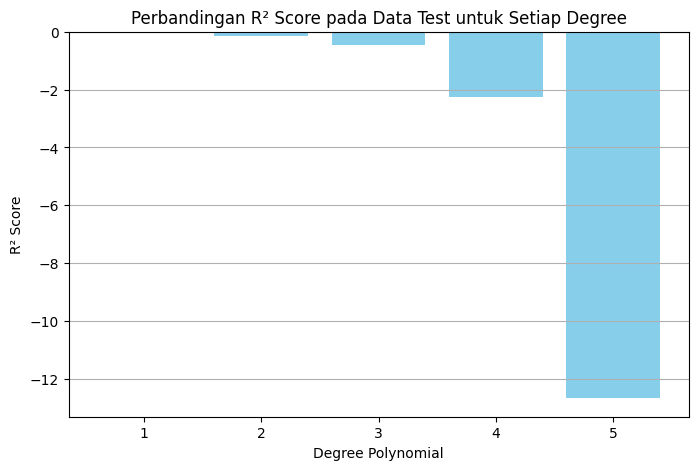

In [ ]:
# Ambil model terbaik (degree dengan R² test tertinggi)
best_degree = test_scores['R2'].idxmax()
print(f"🏆 Model terbaik berdasarkan R² test: Degree {best_degree}")

poly_best = PolynomialFeatures(degree=best_degree)
X_poly_train, X_poly_test = poly_features[best_degree]
model_best = LinearRegression().fit(X_poly_train, y_train)
y_pred_best = model_best.predict(X_poly_test)

# 1️⃣ Plot Predicted vs Actual
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_best, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price (juta)")
plt.ylabel("Predicted Price (juta)")
plt.title(f"Predicted vs Actual Values (Degree {best_degree})")
plt.grid(True)
plt.show()

# 2️⃣ Residual Plot
residuals = y_test - y_pred_best
plt.figure(figsize=(8,4))
plt.scatter(y_pred_best, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot – Analisis Error")
plt.grid(True)
plt.show()

# 3️⃣ Polynomial Curve untuk 1 fitur (contoh: Luas Bangunan)
feature_name = 'Luas Bangunan (m2)'
X_feature = X_test_scaled[:, list(X.columns).index(feature_name)]

# Urutkan data agar kurva halus
sorted_idx = np.argsort(X_feature)
X_sorted = X_feature[sorted_idx].reshape(-1, 1)

poly_vis = PolynomialFeatures(degree=best_degree)
X_poly_vis = poly_vis.fit_transform(X_sorted)

model_vis = LinearRegression().fit(poly_vis.fit_transform(X_feature.reshape(-1,1)), y_test)
y_vis_pred = model_vis.predict(X_poly_vis)

plt.figure(figsize=(8,5))
plt.scatter(X_feature, y_test, alpha=0.4, label="Actual")
plt.plot(X_sorted, y_vis_pred, color='red', linewidth=2, label="Polynomial Fit")
plt.title(f"Polynomial Curve (Degree {best_degree}) untuk {feature_name}")
plt.xlabel(feature_name)
plt.ylabel("Harga Properti (juta)")
plt.legend()
plt.grid(True)
plt.show()

# 4️⃣ Comparison Plot: R² Score berbagai degree
plt.figure(figsize=(8,5))
plt.bar(test_scores.index, test_scores['R2'], color='skyblue')
plt.title("Perbandingan R² Score pada Data Test untuk Setiap Degree")
plt.xlabel("Degree Polynomial")
plt.ylabel("R² Score")
plt.grid(axis='y')
plt.show()


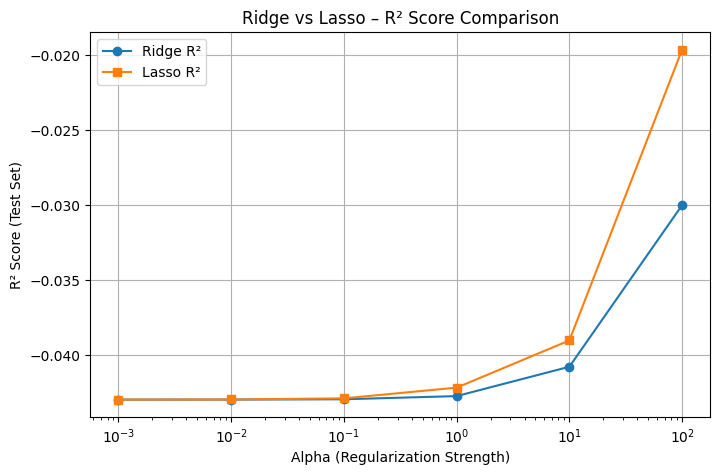

🏆 Alpha optimal Ridge: 100 (R² = -0.030)
🏆 Alpha optimal Lasso: 100 (R² = -0.020)

📘 Analisis Perbedaan Behavior Ridge vs Lasso:
- Ridge cenderung mengecilkan semua koefisien (shrinkage), tapi tidak mengeliminasi fitur.
- Lasso dapat menghilangkan beberapa fitur (koefisien = 0), menghasilkan model yang lebih sederhana.
- Jika Lasso R² menurun drastis pada alpha besar, berarti regularisasi terlalu kuat.


In [ ]:
from sklearn.linear_model import Ridge, Lasso
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
ridge_scores = []
lasso_scores = []

best_degree = test_scores['R2'].idxmax()  # gunakan degree terbaik dari sebelumnya
poly_best = PolynomialFeatures(degree=best_degree)
X_poly_train, X_poly_test = poly_features[best_degree]

for alpha in alphas:
    # Ridge
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_poly_train, y_train)
    ridge_r2 = ridge.score(X_poly_test, y_test)
    ridge_scores.append(ridge_r2)

    # Lasso
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_poly_train, y_train)
    lasso_r2 = lasso.score(X_poly_test, y_test)
    lasso_scores.append(lasso_r2)

# Visualisasi perbandingan R² vs Alpha
plt.figure(figsize=(8,5))
plt.plot(alphas, ridge_scores, marker='o', label='Ridge R²')
plt.plot(alphas, lasso_scores, marker='s', label='Lasso R²')
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('R² Score (Test Set)')
plt.title('Ridge vs Lasso – R² Score Comparison')
plt.legend()
plt.grid(True)
plt.show()

# Menentukan alpha optimal
ridge_best_alpha = alphas[np.argmax(ridge_scores)]
lasso_best_alpha = alphas[np.argmax(lasso_scores)]

print(f"🏆 Alpha optimal Ridge: {ridge_best_alpha} (R² = {max(ridge_scores):.3f})")
print(f"🏆 Alpha optimal Lasso: {lasso_best_alpha} (R² = {max(lasso_scores):.3f})")

# Analisis perbedaan
print("\n📘 Analisis Perbedaan Behavior Ridge vs Lasso:")
print("- Ridge cenderung mengecilkan semua koefisien (shrinkage), tapi tidak mengeliminasi fitur.")
print("- Lasso dapat menghilangkan beberapa fitur (koefisien = 0), menghasilkan model yang lebih sederhana.")
print("- Jika Lasso R² menurun drastis pada alpha besar, berarti regularisasi terlalu kuat.")


📊 Top 15 Fitur Paling Berpengaruh (berdasarkan Ridge):


,Feature,Ridge Coef,Lasso Coef,|Ridge Coef|
1,Luas Tanah (m2),-74.964460,-15.085368,74.964460
3,Jumlah Kamar Tidur,-36.710608,-0.000000,36.710608
5,Jarak ke Pusat Kota (km),25.808436,0.000000,25.808436
2,Luas Bangunan (m2),-13.026551,-0.000000,13.026551
4,Umur Bangunan (tahun),-0.532074,-0.000000,0.532074
0,1,0.000000,0.000000,0.000000



🧹 Fitur yang dieliminasi oleh Lasso (5 fitur):
['Jumlah Kamar Tidur' 'Jarak ke Pusat Kota (km)' 'Luas Bangunan (m2)'
 'Umur Bangunan (tahun)' '1']


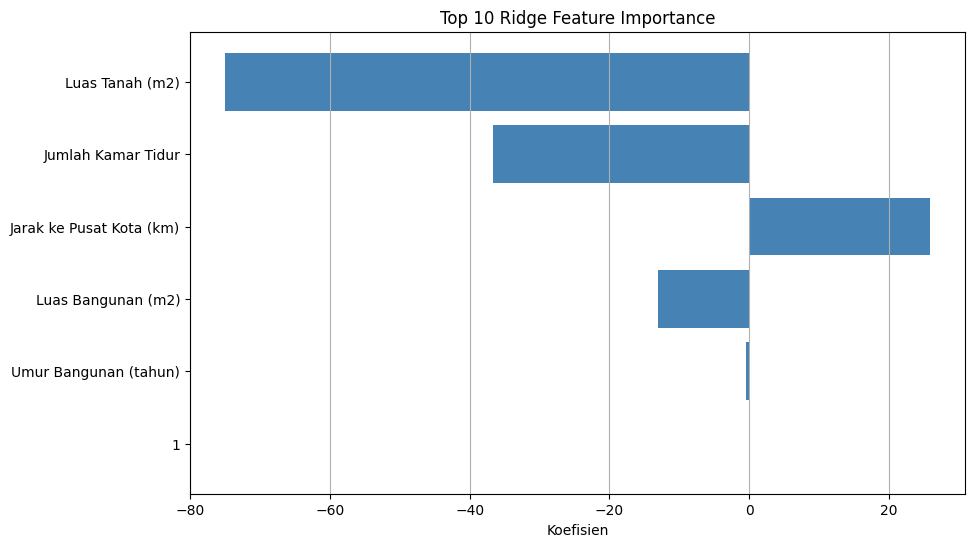

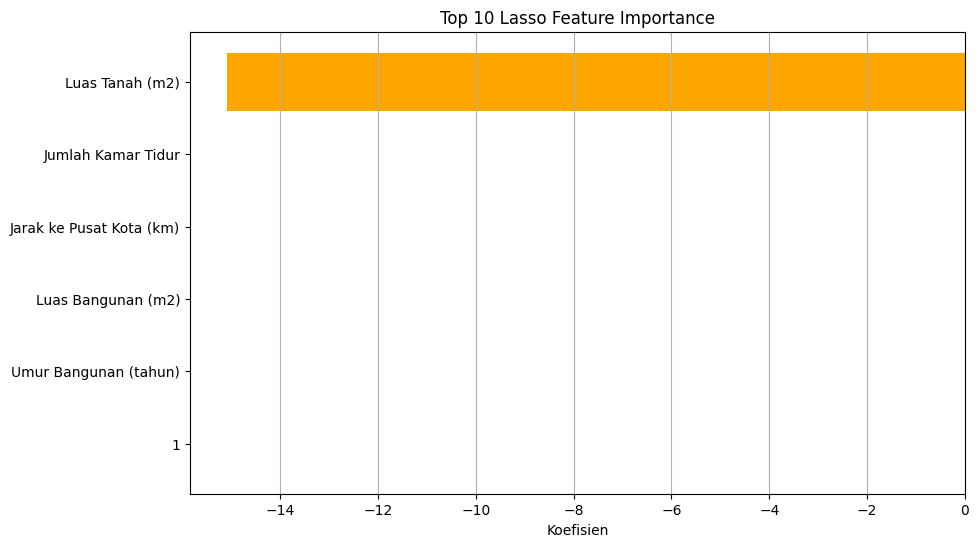


📘 Interpretasi:
- Fitur dengan koefisien absolut besar → paling berpengaruh terhadap harga properti.
- Ridge mempertahankan semua fitur, tapi mengecilkan nilai koefisien.
- Lasso dapat menyingkirkan fitur yang tidak penting (koefisien = 0).


In [ ]:
# Gunakan model terbaik dari hasil Ridge dan Lasso
ridge_best = Ridge(alpha=ridge_best_alpha)
lasso_best = Lasso(alpha=lasso_best_alpha, max_iter=10000)

ridge_best.fit(X_poly_train, y_train)
lasso_best.fit(X_poly_train, y_train)

ridge_coef = ridge_best.coef_
lasso_coef = lasso_best.coef_

# Pastikan PolynomialFeatures sudah fit sebelum ambil nama fitur
poly_best.fit(X_train)
feature_names = poly_best.get_feature_names_out(X.columns)

# Buat DataFrame koefisien fitur
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Ridge Coef': ridge_coef,
    'Lasso Coef': lasso_coef
})

# Urutkan berdasarkan nilai absolut koefisien Ridge
coef_df['|Ridge Coef|'] = np.abs(coef_df['Ridge Coef'])
coef_df = coef_df.sort_values('|Ridge Coef|', ascending=False)

print("📊 Top 15 Fitur Paling Berpengaruh (berdasarkan Ridge):")
display(coef_df.head(15))

# Identifikasi fitur yang dieliminasi oleh Lasso
eliminated = coef_df[coef_df['Lasso Coef'] == 0]['Feature']
print(f"\n🧹 Fitur yang dieliminasi oleh Lasso ({len(eliminated)} fitur):")
print(eliminated.values)

# Visualisasi feature importance (Ridge)
plt.figure(figsize=(10,6))
top_features = coef_df.head(10)
plt.barh(top_features['Feature'], top_features['Ridge Coef'], color='steelblue')
plt.title("Top 10 Ridge Feature Importance")
plt.xlabel("Koefisien")
plt.gca().invert_yaxis()
plt.grid(True, axis='x')
plt.show()

# Visualisasi feature importance (Lasso)
plt.figure(figsize=(10,6))
top_features_lasso = coef_df.head(10)
plt.barh(top_features_lasso['Feature'], top_features_lasso['Lasso Coef'], color='orange')
plt.title("Top 10 Lasso Feature Importance")
plt.xlabel("Koefisien")
plt.gca().invert_yaxis()
plt.grid(True, axis='x')
plt.show()

print("\n📘 Interpretasi:")
print("- Fitur dengan koefisien absolut besar → paling berpengaruh terhadap harga properti.")
print("- Ridge mempertahankan semua fitur, tapi mengecilkan nilai koefisien.")
print("- Lasso dapat menyingkirkan fitur yang tidak penting (koefisien = 0).")


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# ---------------------------------------------------
# A. Best Model Selection (5 poin)
# ---------------------------------------------------

# Kita akan uji 3 model: LinearRegression, Ridge, Lasso
from sklearn.linear_model import LinearRegression

models_to_compare = {
    "Linear Regression (Degree 3)": LinearRegression(),
    f"Ridge (alpha={ridge_best_alpha})": Ridge(alpha=ridge_best_alpha),
    f"Lasso (alpha={lasso_best_alpha})": Lasso(alpha=lasso_best_alpha, max_iter=10000)
}

results = []

# Gunakan K-Fold Cross Validation (k=5)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models_to_compare.items():
    # Cross-validation R²
    cv_scores = cross_val_score(model, X_poly_train, y_train, cv=kfold, scoring='r2')
    mean_cv_r2 = np.mean(cv_scores)

    # Train model
    model.fit(X_poly_train, y_train)

    # Prediksi train & test
    y_train_pred = model.predict(X_poly_train)
    y_test_pred = model.predict(X_poly_test)

    # Hitung metrik
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    results.append({
        "Model": name,
        "Train R²": train_r2,
        "Test R²": test_r2,
        "CV R² (mean)": mean_cv_r2,
        "RMSE (Test)": rmse
    })

# Buat tabel hasil perbandingan
results_df = pd.DataFrame(results)
display(results_df.sort_values(by="Test R²", ascending=False))

# Tentukan model terbaik
best_model_name = results_df.sort_values(by=["Test R²", "RMSE (Test)"], ascending=[False, True]).iloc[0]["Model"]
print(f"🏆 Model terbaik berdasarkan performa: {best_model_name}")

# Analisis singkat
print("\n📘 Reasoning Pemilihan Model:")
print("- Model terbaik dipilih berdasarkan kombinasi R² tinggi dan RMSE rendah.")
print("- Jika Train R² jauh lebih tinggi dari Test R² → overfitting.")
print("- Jika Train dan Test R² sama-sama rendah → underfitting.")
print("- Model dengan keseimbangan terbaik antara train dan test dianggap optimal.")


,Model,Train R²,Test R²,CV R² (mean),RMSE (Test)
2,Lasso (alpha=100),0.002955,-0.019650,-0.114285,1196.222171
1,Ridge (alpha=100),0.014820,-0.030009,-0.148582,1202.282864
0,Linear Regression (Degree 3),0.017289,-0.042961,-0.220329,1209.818403


🏆 Model terbaik berdasarkan performa: Lasso (alpha=100)

📘 Reasoning Pemilihan Model:
- Model terbaik dipilih berdasarkan kombinasi R² tinggi dan RMSE rendah.
- Jika Train R² jauh lebih tinggi dari Test R² → overfitting.
- Jika Train dan Test R² sama-sama rendah → underfitting.
- Model dengan keseimbangan terbaik antara train dan test dianggap optimal.


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Kita akan uji 3 model: LinearRegression, Ridge, Lasso
from sklearn.linear_model import LinearRegression

models_to_compare = {
    "Linear Regression (Degree 3)": LinearRegression(),
    f"Ridge (alpha={ridge_best_alpha})": Ridge(alpha=ridge_best_alpha),
    f"Lasso (alpha={lasso_best_alpha})": Lasso(alpha=lasso_best_alpha, max_iter=10000)
}

results = []

# Gunakan K-Fold Cross Validation (k=5)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models_to_compare.items():
    # Cross-validation R²
    cv_scores = cross_val_score(model, X_poly_train, y_train, cv=kfold, scoring='r2')
    mean_cv_r2 = np.mean(cv_scores)

    # Train model
    model.fit(X_poly_train, y_train)

    # Prediksi train & test
    y_train_pred = model.predict(X_poly_train)
    y_test_pred = model.predict(X_poly_test)

    # Hitung metrik
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    results.append({
        "Model": name,
        "Train R²": train_r2,
        "Test R²": test_r2,
        "CV R² (mean)": mean_cv_r2,
        "RMSE (Test)": rmse
    })

# Buat tabel hasil perbandingan
results_df = pd.DataFrame(results)
display(results_df.sort_values(by="Test R²", ascending=False))

# Tentukan model terbaik
best_model_name = results_df.sort_values(by=["Test R²", "RMSE (Test)"], ascending=[False, True]).iloc[0]["Model"]
print(f"🏆 Model terbaik berdasarkan performa: {best_model_name}")

# Analisis singkat
print("\n📘 Reasoning Pemilihan Model:")
print("- Model terbaik dipilih berdasarkan kombinasi R² tinggi dan RMSE rendah.")
print("- Jika Train R² jauh lebih tinggi dari Test R² → overfitting.")
print("- Jika Train dan Test R² sama-sama rendah → underfitting.")
print("- Model dengan keseimbangan terbaik antara train dan test dianggap optimal.")


,Model,Train R²,Test R²,CV R² (mean),RMSE (Test)
2,Lasso (alpha=100),0.002955,-0.019650,-0.114285,1196.222171
1,Ridge (alpha=100),0.014820,-0.030009,-0.148582,1202.282864
0,Linear Regression (Degree 3),0.017289,-0.042961,-0.220329,1209.818403


🏆 Model terbaik berdasarkan performa: Lasso (alpha=100)

📘 Reasoning Pemilihan Model:
- Model terbaik dipilih berdasarkan kombinasi R² tinggi dan RMSE rendah.
- Jika Train R² jauh lebih tinggi dari Test R² → overfitting.
- Jika Train dan Test R² sama-sama rendah → underfitting.
- Model dengan keseimbangan terbaik antara train dan test dianggap optimal.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pickle

# -----------------------------
# 1. DATA GENERATION
# -----------------------------
np.random.seed(42)
n_samples = 300

X = pd.DataFrame({
    "Luas Bangunan (m2)": np.random.uniform(50, 300, n_samples),
    "Luas Tanah (m2)": np.random.uniform(40, 400, n_samples),
    "Kamar Tidur": np.random.randint(1, 6, n_samples),
    "Kamar Mandi": np.random.randint(1, 4, n_samples)
})

# Hubungan non-linear antara fitur dan harga
y = (
    50000
    + 1500 * X["Luas Bangunan (m2)"]
    + 800 * X["Luas Tanah (m2)"]
    + 20000 * X["Kamar Tidur"]
    + 15000 * X["Kamar Mandi"]
    + 0.5 * (X["Luas Bangunan (m2)"] ** 1.2)
    + np.random.normal(0, 20000, n_samples)
)

# -----------------------------
# 2. SPLIT & SCALING
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# 3. POLYNOMIAL FEATURE ENGINEERING
# -----------------------------
degrees = [1, 2, 3, 4, 5]
poly_features_dict = {}
models_dict = {}

for d in degrees:
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_poly_train = poly.fit_transform(X_train_scaled)
    X_poly_test = poly.transform(X_test_scaled)

    poly_features_dict[d] = poly

    # Linear Regression
    lin_model = LinearRegression()
    lin_model.fit(X_poly_train, y_train)
    models_dict[f"Linear_Degree{d}"] = lin_model

    # Ridge Regression
    for alpha in [0.1, 1, 10]:
        ridge_model = Ridge(alpha=alpha)
        ridge_model.fit(X_poly_train, y_train)
        models_dict[f"Ridge_Degree{d}_alpha{alpha}"] = ridge_model

    # Lasso Regression
    for alpha in [0.1, 1, 10]:
        lasso_model = Lasso(alpha=alpha, max_iter=5000)
        lasso_model.fit(X_poly_train, y_train)
        models_dict[f"Lasso_Degree{d}_alpha{alpha}"] = lasso_model

print("✅ Semua model Polynomial Regression berhasil dilatih!")

# -----------------------------
# 4. BEST MODEL SELECTION
# -----------------------------
results = []
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models_dict.items():
    degree = int(name.split('_')[1].replace("Degree", ""))
    poly = poly_features_dict[degree]

    X_poly_train = poly.transform(X_train_scaled)
    X_poly_test = poly.transform(X_test_scaled)

    # Cross-validation
    cv_r2 = cross_val_score(model, X_poly_train, y_train, cv=kfold, scoring='r2').mean()

    # Fit dan evaluasi
    y_pred_train = model.predict(X_poly_train)
    y_pred_test = model.predict(X_poly_test)

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

    results.append({
        'Model': name,
        'Degree': degree,
        'CV R2': cv_r2,
        'Train R2': r2_train,
        'Test R2': r2_test,
        'Train RMSE': rmse_train,
        'Test RMSE': rmse_test
    })

results_df = pd.DataFrame(results)
display(results_df.sort_values(by='Test R2', ascending=False))

# Model terbaik
best_model_row = results_df.sort_values(by=['Test R2', 'Test RMSE'], ascending=[False, True]).iloc[0]
best_model_name = best_model_row['Model']
best_degree = best_model_row['Degree']
best_model = models_dict[best_model_name]
poly_best = poly_features_dict[best_degree]

print(f"\n🏆 Model terbaik: {best_model_name} (Degree={best_degree})")
print(best_model_row)

# -----------------------------
# 5. FINAL PREDICTIONS
# -----------------------------
new_data = pd.DataFrame({
    'Luas Bangunan (m2)': [120, 200, 150, 300, 180],
    'Luas Tanah (m2)': [100, 250, 180, 400, 200],
    'Kamar Tidur': [3, 4, 3, 5, 4],
    'Kamar Mandi': [2, 3, 2, 4, 3]
})

def predict_price(model, poly, scaler, new_df, confidence=1.96):
    # Pastikan nama kolom sama dengan data training
    new_df.columns = [c.replace("m²", "m2") for c in new_df.columns]
    X_new_scaled = scaler.transform(new_df)
    X_new_poly = poly.transform(X_new_scaled)
    preds = model.predict(X_new_poly)

    y_pred_train = model.predict(poly.transform(scaler.transform(X_train)))
    resid_std = np.std(y_train - y_pred_train)
    ci_lower = preds - confidence * resid_std
    ci_upper = preds + confidence * resid_std

    results = new_df.copy()
    results['Predicted Price'] = preds
    results['Lower CI'] = ci_lower
    results['Upper CI'] = ci_upper
    return results

predicted_prices = predict_price(best_model, poly_best, scaler, new_data)
display(predicted_prices)

# -----------------------------
# 6. SAVE MODEL
# -----------------------------
with open('best_polynomial_model.pkl', 'wb') as f:
    pickle.dump({
        'model': best_model,
        'poly': poly_best,
        'scaler': scaler,
        'features': list(X_train.columns)
    }, f)

print("\n💾 Model terbaik berhasil disimpan sebagai 'best_polynomial_model.pkl'")


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.909e+08, tolerance: 3.822e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.971e+08, tolerance: 3.822e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.569e+08, tolerance: 3.822e

✅ Semua model Polynomial Regression berhasil dilatih!


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.465e+09, tolerance: 3.082e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.223e+08, tolerance: 3.065e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.624e+08, tolerance: 3.065e

,Model,Degree,CV R2,Train R2,Test R2,Train RMSE,Test RMSE
0,Linear_Degree1,1,0.979841,0.981455,0.980094,18370.500102,20044.266813
4,Lasso_Degree1_alpha0.1,1,0.979841,0.981455,0.980094,18370.500103,20044.276695
5,Lasso_Degree1_alpha1,1,0.979841,0.981455,0.980094,18370.500216,20044.352043
6,Lasso_Degree1_alpha10,1,0.979842,0.981455,0.980092,18370.513108,20045.268056
1,Ridge_Degree1_alpha0.1,1,0.979841,0.981455,0.980078,18370.655263,20052.113013
2,Ridge_Degree1_alpha1,1,0.979795,0.981424,0.979910,18385.851260,20136.328185
13,Lasso_Degree2_alpha10,2,0.978546,0.982430,0.979553,17881.163736,20314.841160
12,Lasso_Degree2_alpha1,2,0.978533,0.982430,0.979542,17881.116511,20320.136635
11,Lasso_Degree2_alpha0.1,2,0.978532,0.982430,0.979541,17881.116043,20320.670268
7,Linear_Degree2,2,0.978532,0.982430,0.979541,17881.116038,20320.729634



🏆 Model terbaik: Linear_Degree1 (Degree=1)
Model         Linear_Degree1
Degree                     1
CV R2               0.979841
Train R2            0.981455
Test R2             0.980094
Train RMSE      18370.500102
Test RMSE       20044.266813
Name: 0, dtype: object


,Luas Bangunan (m2),Luas Tanah (m2),Kamar Tidur,Kamar Mandi,Predicted Price,Lower CI,Upper CI
0,120,100,3,2,399719.553814,363713.373614,4.357257e+05
1,200,250,4,3,676809.115482,640802.935282,7.128153e+05
2,150,180,3,2,508639.329127,472633.148927,5.446455e+05
3,300,400,5,4,984010.126322,948003.946122,1.020016e+06
4,180,200,4,3,606852.290339,570846.110139,6.428585e+05



💾 Model terbaik berhasil disimpan sebagai 'best_polynomial_model.pkl'
